Standard linear regression using a squared exponential basis function.

In [5]:
import numpy as np
from ARX.Regressors import Linear

Sample some data with a 2D input:

In [6]:
X = np.random.uniform(0, 5, size=(100, 2))
y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + 0.1 * np.random.randn(100)

Fit linear model with zero auto-regressive componens, using the squared exponential basis function:

In [7]:
model = Linear(N_AR=0, basis='se')
model.train(X, y, n_clusters=15)

15


Plot fit as a surface over the data:

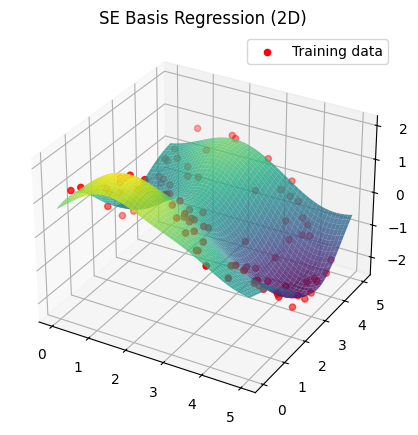

In [8]:
x1, x2 = np.meshgrid(np.linspace(0, 5, 50), np.linspace(0, 5, 50))
X_test = np.column_stack([x1.ravel(), x2.ravel()])
y_pred = model.predict(X_test).reshape(50, 50)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_pred, cmap='viridis', alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], y, color='red', label='Training data')
ax.set_title("SE Basis Regression (2D)")
plt.legend()